# Visualisations des vulnérabilités
Ce notebook génère l'ensemble des graphiques pour analyser les données issues de `data/consolidated.csv`.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement et prétraitement
df = pd.read_csv('C:\\Users\\ferac\\Documents\\GitHub\\Project-Mastercamp\\data\\consolidated.csv', sep=',')
df['cvss_score'] = pd.to_numeric(df['cvss_score'], errors='coerce')
df['epss_score'] = pd.to_numeric(df['epss_score'], errors='coerce')
df['date_pub'] = pd.to_datetime(df['date_pub'], errors='coerce')

# Affichage d'un aperçu
df.head()

,id_ansi,titre,type_bulletin,date_pub,cve_id,cvss_score,base_severity,cwe_id,epss_score,lien_bulletin,description,vendor,produit,versions
0,CERTFR-2025-AVI-0392,Multiples vulnérabilités dans Mattermost Serve...,avis,2025-05-13 00:00:00+00:00,CVE-2025-4128,3.1,Moyenne,CWE-863,0.00021,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"Mattermost versions 10.5.x <= 10.5.4, 9.11.x <...",Mattermost,Mattermost,10.5.0; 9.11.0
1,CERTFR-2025-AVI-0392,Multiples vulnérabilités dans Mattermost Serve...,avis,2025-05-13 00:00:00+00:00,CVE-2025-4573,4.1,Moyenne,CWE-90,0.00022,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"Mattermost versions 10.7.x <= 10.7.1, 10.6.x <...",Mattermost,Mattermost,10.5.0; 10.6.0; 10.7.0; 9.11.0
2,CERTFR-2025-AVI-0396,Multiples vulnérabilités dans les produits SAP...,avis,2025-05-13 00:00:00+00:00,CVE-2024-39592,7.7,Élevée,CWE-862,0.00136,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,Elements of PDCE does not perform necessary\na...,SAP_SE,SAP PDCE,S4CORE 102; S4CORE 103; S4COREOP 104; S4COREOP...
3,CERTFR-2025-AVI-0396,Multiples vulnérabilités dans les produits SAP...,avis,2025-05-13 00:00:00+00:00,CVE-2025-0060,6.5,Élevée,CWE-94,0.00038,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,SAP BusinessObjects Business Intelligence Plat...,SAP_SE,SAP BusinessObjects Business Intelligence Plat...,2025; 430; ENTERPRISE 420
4,CERTFR-2025-AVI-0396,Multiples vulnérabilités dans les produits SAP...,avis,2025-05-13 00:00:00+00:00,CVE-2025-0061,8.7,Critique,CWE-497,0.00049,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,SAP BusinessObjects Business Intelligence Plat...,SAP_SE,SAP BusinessObjects Business Intelligence Plat...,2025; 430; ENTERPRISE 420


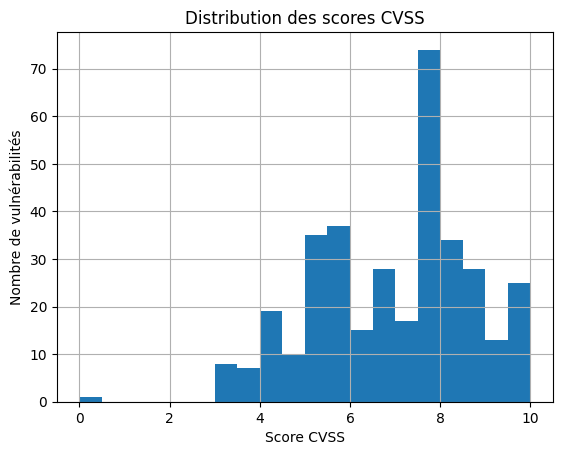

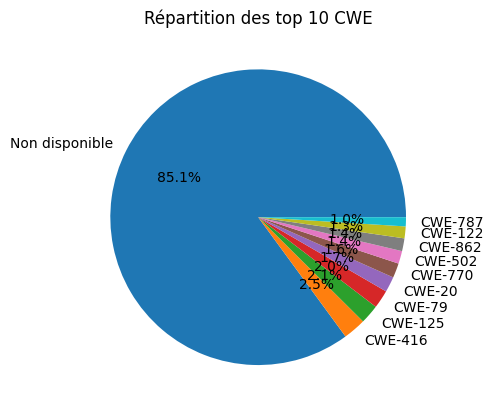

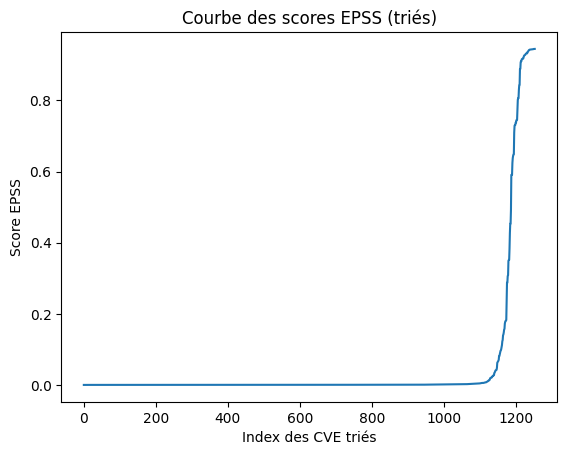

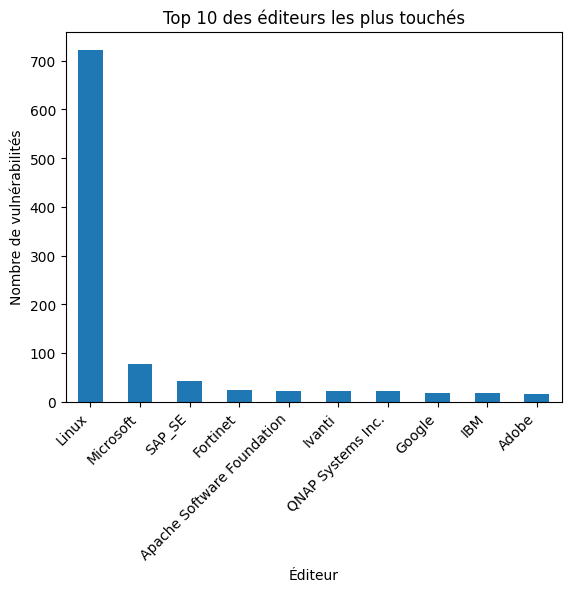

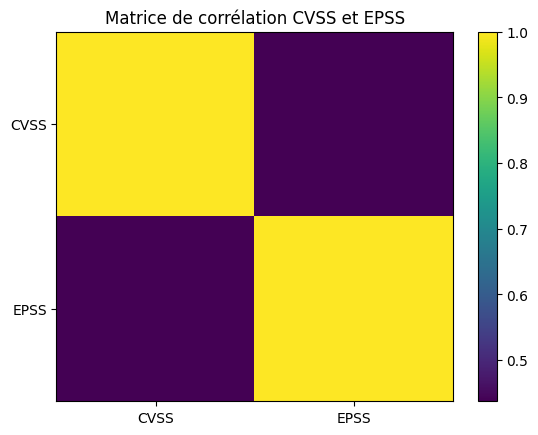

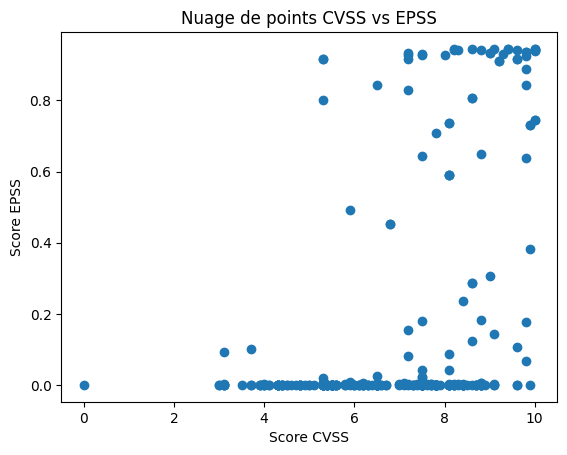

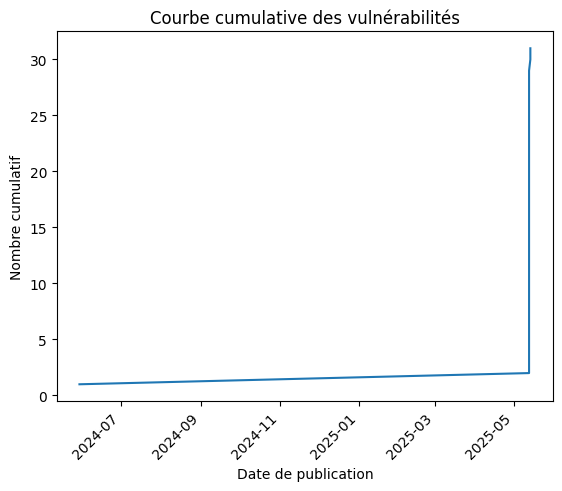

C:\Users\ferac\AppData\Local\Temp\ipykernel_2688\2219832234.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=top_vendors)


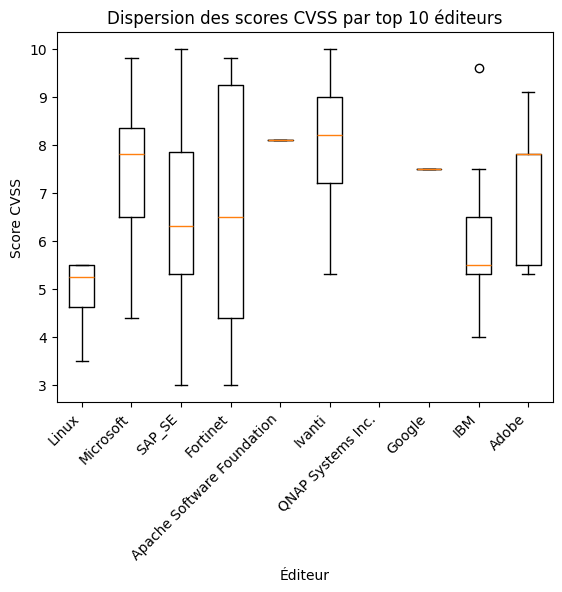

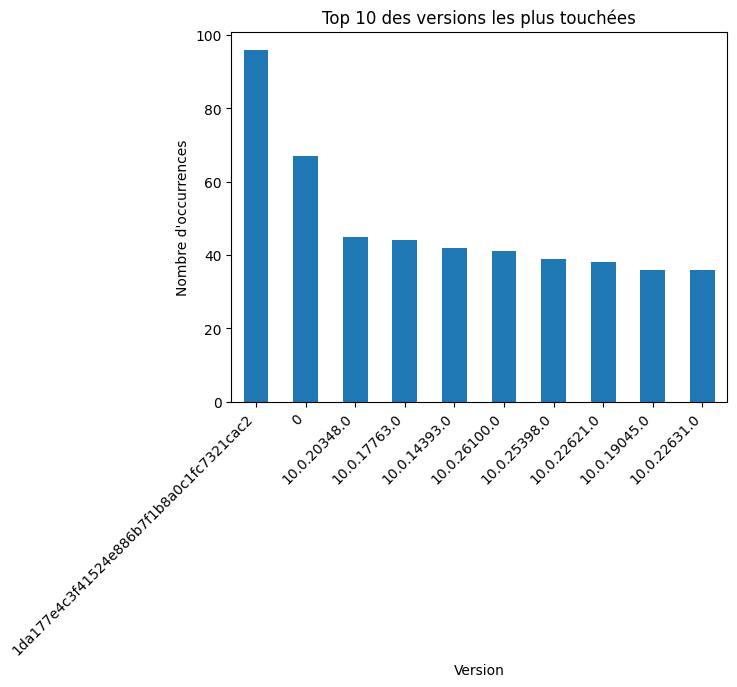

<Figure size 640x480 with 0 Axes>

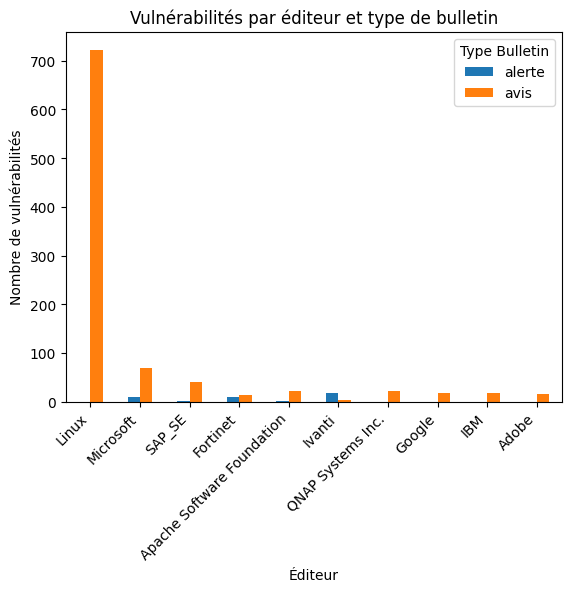

In [11]:
# 1. Histogramme des scores CVSS
plt.figure()
df['cvss_score'].dropna().hist(bins=20)
plt.title('Distribution des scores CVSS')
plt.xlabel('Score CVSS')
plt.ylabel('Nombre de vulnérabilités')
plt.show()

# 2. Camembert des top 10 CWE
cwe_counts = df['cwe_id'].fillna('Non disponible').value_counts().head(10)
plt.figure()
plt.pie(cwe_counts, labels=cwe_counts.index, autopct='%1.1f%%')
plt.title('Répartition des top 10 CWE')
plt.show()

# 3. Courbe des scores EPSS triés
epss_sorted = df['epss_score'].dropna().sort_values().reset_index(drop=True)
plt.figure()
plt.plot(epss_sorted)
plt.title('Courbe des scores EPSS (triés)')
plt.xlabel('Index des CVE triés')
plt.ylabel('Score EPSS')
plt.show()

# 4. Top 10 des éditeurs les plus touchés
vendor_counts = df['vendor'].value_counts().head(10)
plt.figure()
vendor_counts.plot(kind='bar')
plt.title('Top 10 des éditeurs les plus touchés')
plt.xlabel('Éditeur')
plt.ylabel('Nombre de vulnérabilités')
plt.xticks(rotation=45, ha='right')
plt.show()

# 5. Heatmap de corrélation CVSS vs EPSS
corr = df[['cvss_score','epss_score']].corr()
plt.figure()
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks([0,1], ['CVSS','EPSS'])
plt.yticks([0,1], ['CVSS','EPSS'])
plt.title('Matrice de corrélation CVSS et EPSS')
plt.show()

# 6. Nuage de points CVSS vs EPSS
plt.figure()
plt.scatter(df['cvss_score'], df['epss_score'])
plt.title('Nuage de points CVSS vs EPSS')
plt.xlabel('Score CVSS')
plt.ylabel('Score EPSS')
plt.show()

# 7. Courbe cumulative des vulnérabilités au fil du temps
df_time = df.dropna(subset=['date_pub']).sort_values('date_pub').copy()
df_time['cum_count'] = range(1, len(df_time) + 1)
plt.figure()
plt.plot(df_time['date_pub'], df_time['cum_count'])
plt.title('Courbe cumulative des vulnérabilités')
plt.xlabel('Date de publication')
plt.ylabel('Nombre cumulatif')
plt.xticks(rotation=45, ha='right')
plt.show()

# 8. Boxplot des scores CVSS par éditeur (Top 10)
top_vendors = vendor_counts.index
df_top = df[df['vendor'].isin(top_vendors)]
plt.figure()
data_to_plot = [df_top[df_top['vendor'] == v]['cvss_score'].dropna() for v in top_vendors]
plt.boxplot(data_to_plot, labels=top_vendors)
plt.title('Dispersion des scores CVSS par top 10 éditeurs')
plt.xlabel('Éditeur')
plt.ylabel('Score CVSS')
plt.xticks(rotation=45, ha='right')
plt.show()

# 9. Top 10 des versions les plus touchées
df_versions = df[['versions']].dropna().copy()
df_versions['versions_list'] = df_versions['versions'].str.split(';')
df_exp = df_versions.explode('versions_list')
df_exp['versions_list'] = df_exp['versions_list'].str.strip()
version_counts = df_exp['versions_list'].value_counts().head(10)
plt.figure()
version_counts.plot(kind='bar')
plt.title('Top 10 des versions les plus touchées')
plt.xlabel('Version')
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45, ha='right')
plt.show()

# 10. Vulnérabilités par éditeur et type de bulletin (avis vs alertes)
df_pivot = df.groupby(['vendor','type_bulletin']).size().unstack(fill_value=0)
df_pivot_top = df_pivot.loc[top_vendors]
plt.figure()
df_pivot_top.plot(kind='bar')
plt.title('Vulnérabilités par éditeur et type de bulletin')
plt.xlabel('Éditeur')
plt.ylabel('Nombre de vulnérabilités')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type Bulletin')
plt.show()

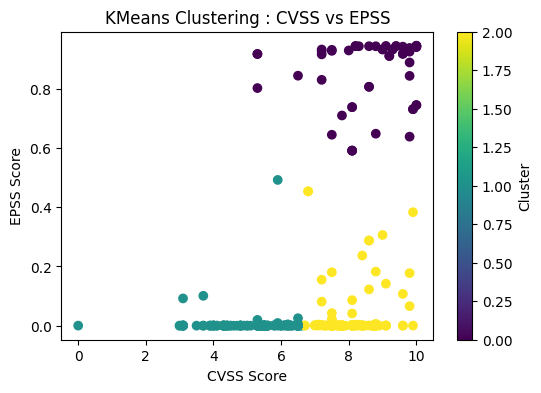

Silhouette Score (KMeans, k=3) : 0.63
MSE de la régression linéaire : 0.051500
Validation croisée (5 folds) MSE : 0.113364


In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, silhouette_score
import numpy as np

# ========================== Non supervisé : KMeans ==========================
# Données pour clustering : CVSS + EPSS
df_cluster = df[['cvss_score', 'epss_score']].dropna()

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# KMeans clustering (3 clusters arbitrairement)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df_cluster['cluster'] = clusters

# Affichage des clusters
plt.figure(figsize=(6,4))
plt.scatter(df_cluster['cvss_score'], df_cluster['epss_score'], c=df_cluster['cluster'], cmap='viridis')
plt.title('KMeans Clustering : CVSS vs EPSS')
plt.xlabel('CVSS Score')
plt.ylabel('EPSS Score')
plt.colorbar(label='Cluster')
plt.show()

# Validation du clustering : Silhouette Score
score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score (KMeans, k=3) : {score:.2f}")

# ========================== Supervisé : Régression Linéaire ==========================
# Encodage de base_severity et cwe_id
df_supervised = df[['cvss_score', 'base_severity', 'cwe_id', 'epss_score']].dropna()

le_severity = LabelEncoder()
le_cwe = LabelEncoder()

df_supervised['base_severity_encoded'] = le_severity.fit_transform(df_supervised['base_severity'])
df_supervised['cwe_id_encoded'] = le_cwe.fit_transform(df_supervised['cwe_id'])

# Features et cible
X = df_supervised[['cvss_score', 'base_severity_encoded', 'cwe_id_encoded']]
y = df_supervised['epss_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions et validation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE de la régression linéaire : {mse:.6f}")

# Validation croisée
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Validation croisée (5 folds) MSE : {abs(cv_scores.mean()):.6f}")


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Variables explicatives et cible
X = df[['cvss_score', 'epss_score']].dropna()
y = df.loc[X.index, 'base_severity']  # Cible correspondante

# Encoder la variable cible ('base_severity') en numérique
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardisation des variables explicatives
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split : 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Modèle KNN (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Prédictions
y_pred = knn.predict(X_test)

# Classes présentes dans y_test
labels_present = np.unique(y_test)

print("Classes présentes dans y_test :", le.inverse_transform(labels_present))

# Évaluation avec gestion dynamique des labels
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred,
                                                              labels=labels_present,
                                                              target_names=le.inverse_transform(labels_present)))
print("Accuracy : ", accuracy_score(y_test, y_pred))


Classes présentes dans y_test : ['Critique' 'Moyenne' 'Élevée']
Matrice de confusion :
 [[19  0  0]
 [ 0 25  0]
 [ 3  0 23]]

Rapport de classification :
               precision    recall  f1-score   support

    Critique       0.86      1.00      0.93        19
     Moyenne       1.00      1.00      1.00        25
      Élevée       1.00      0.88      0.94        26

    accuracy                           0.96        70
   macro avg       0.95      0.96      0.96        70
weighted avg       0.96      0.96      0.96        70

Accuracy :  0.9571428571428572


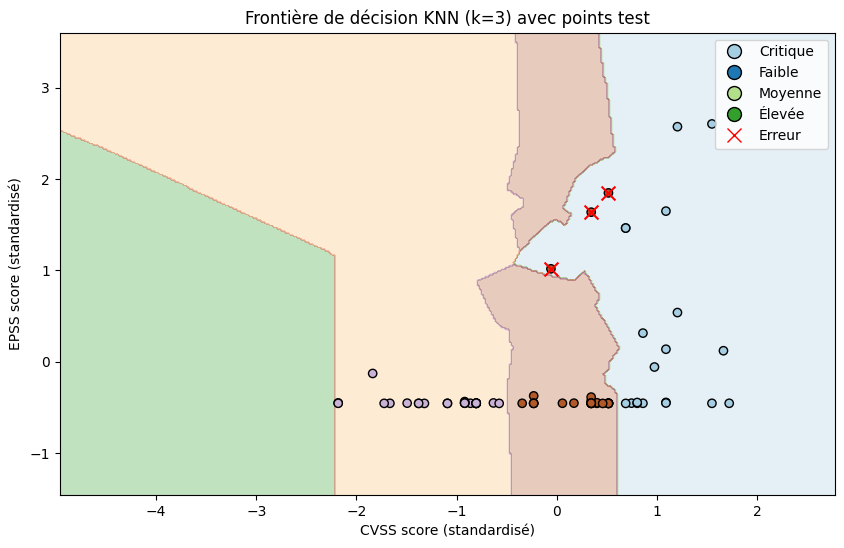

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Définir la grille pour visualiser la frontière de décision
h = 0.02  # pas de la grille

x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Prédire la classe sur chaque point de la grille
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
# Afficher la frontière de décision
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# Afficher les points test, couleur vraie classe
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolor='k')

# Afficher les points test, marqueur x rouge pour erreurs
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        plt.scatter(X_test[i, 0], X_test[i, 1], marker='x', c='red', s=100)

plt.xlabel('CVSS score (standardisé)')
plt.ylabel('EPSS score (standardisé)')
plt.title('Frontière de décision KNN (k=3) avec points test')

# Légende manuelle
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=cls, markerfacecolor=col, markersize=10, markeredgecolor='k')
    for cls, col in zip(le.classes_, plt.cm.Paired.colors[:len(le.classes_)])
]
legend_elements.append(Line2D([0], [0], marker='x', color='w', label='Erreur', markerfacecolor='r', markersize=10, markeredgecolor='r'))
plt.legend(handles=legend_elements)

plt.show()


In [ ]:
import smtplib
from email.mime.text import MIMEText
def send_email(to_email, subject, body):
    from_email = "votre_email@gmail.com"
    password = "mot_de_passe_application"
    msg = MIMEText(body)
msg['From'] = from_email
msg['To'] = to_email
msg['Subject'] = subject
server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()
server.login(from_email, password)
server.sendmail(from_email, to_email, msg.as_string())
server.quit()